PyGMT information:
  version: v0.14.2
System information:
  python: 3.13.2 | packaged by conda-forge | (main, Feb 17 2025, 14:10:22) [GCC 13.3.0]
  executable: /home/user/miniconda3/envs/pygmt/bin/python
  machine: Linux-5.15.0-134-generic-x86_64-with-glibc2.31
Dependency information:
  numpy: 2.2.4
  pandas: 2.2.3
  xarray: 2025.3.0
  netCDF4: 1.7.2
  packaging: 24.2
  contextily: 1.6.2
  geopandas: 1.0.1
  IPython: 9.0.2
  pyarrow: 19.0.1
  rioxarray: 0.18.2
  gdal: 3.10.2
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /opt/GMT-6.5.0/share
  plugin dir: /home/user/miniconda3/envs/pygmt/lib/gmt/plugins
  library path: /home/user/miniconda3/envs/pygmt/lib/libgmt.so
  cores: 20
  grid layout: rows
  image layout: 
  binary version: 6.5.0


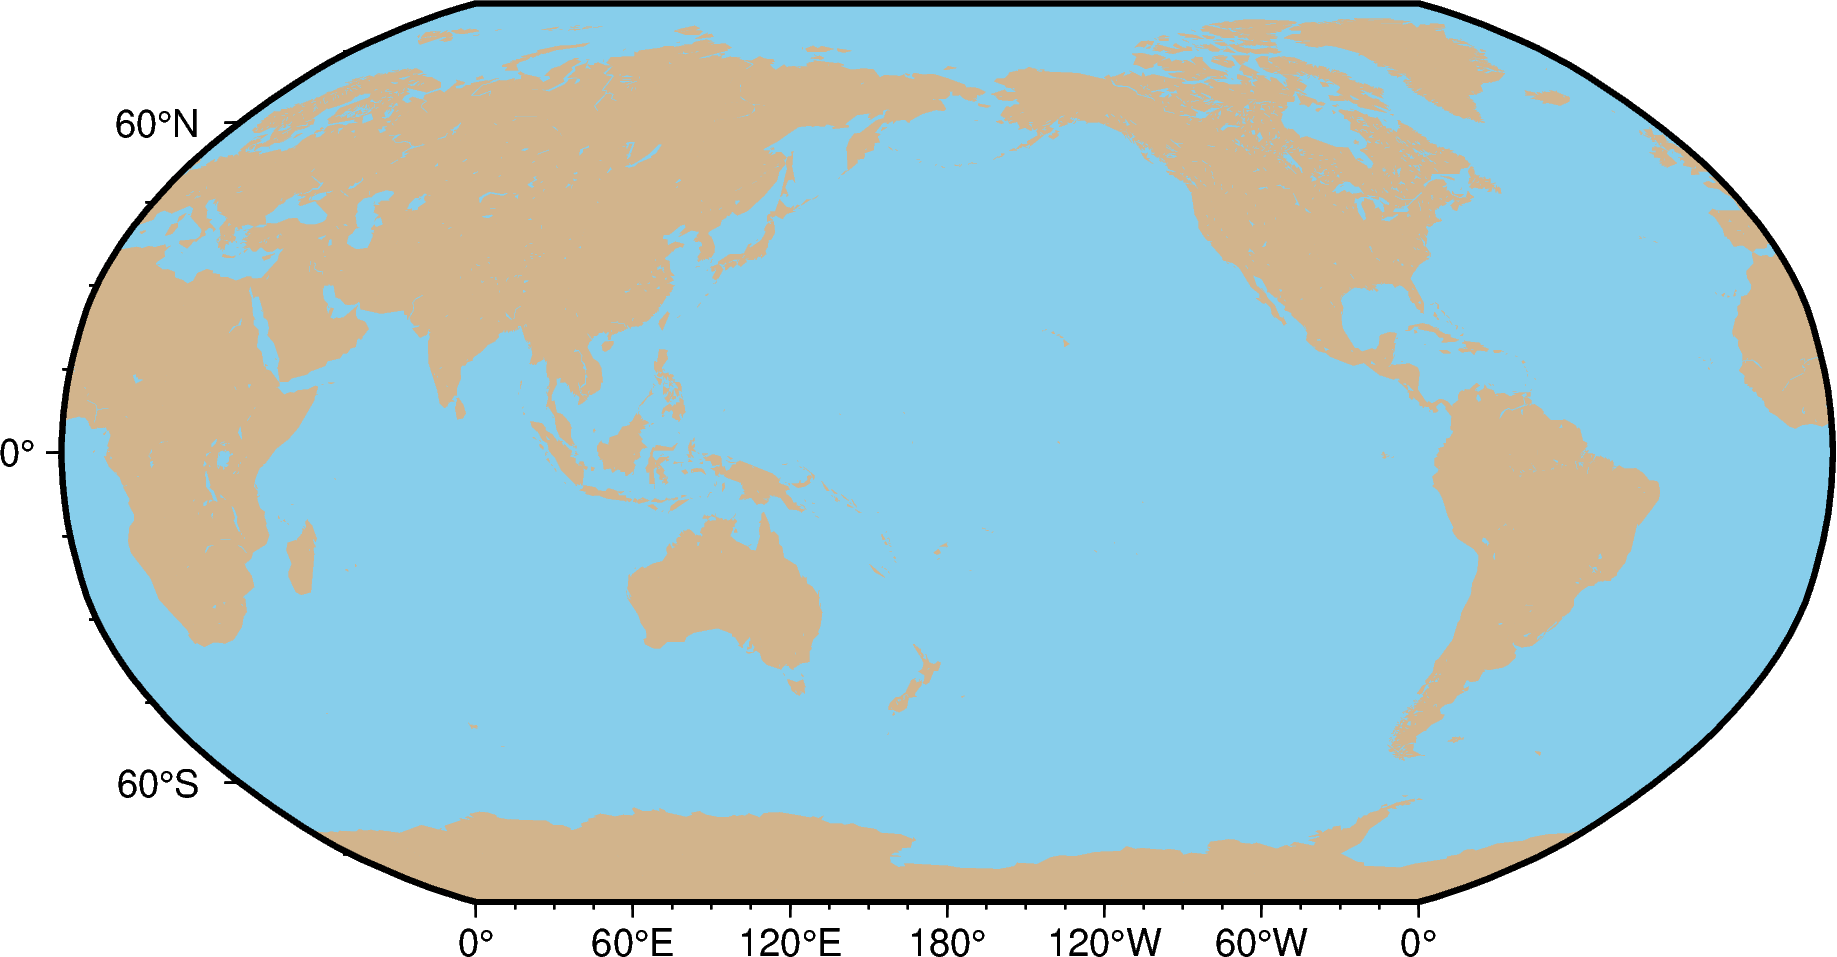

In [4]:
import pygmt
pygmt.show_versions()
fig = pygmt.Figure()
fig.coast(projection="N15c", region="g", frame=True,land="tan",water="skyblue")
fig.show()